In [1]:
###########################

# Problema de clasificación:
# y: arriba o abajo de la mediana del precio de la vivienda

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('dataset.csv')

In [4]:
dataset.head(20)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [6]:
# Seleccionar variables independientes y variables dependientes
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
X[:10]

array([[ 8450,     7,     5,   856,     2,     1,     3,     8,     0,
          548],
       [ 9600,     6,     8,  1262,     2,     0,     3,     6,     1,
          460],
       [11250,     7,     5,   920,     2,     1,     3,     6,     1,
          608],
       [ 9550,     7,     5,   756,     1,     0,     3,     7,     1,
          642],
       [14260,     8,     5,  1145,     2,     1,     4,     9,     1,
          836],
       [14115,     5,     5,   796,     1,     1,     1,     5,     0,
          480],
       [10084,     8,     5,  1686,     2,     0,     3,     7,     1,
          636],
       [10382,     7,     6,  1107,     2,     1,     3,     7,     2,
          484],
       [ 6120,     7,     5,   952,     2,     0,     2,     8,     2,
          468],
       [ 7420,     5,     6,   991,     1,     0,     2,     5,     2,
          205]])

In [8]:
# como no hay variables categóricas no hace falta transformas ningún dato a variable ficticia.

In [9]:
# Dividir el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Escalamos las características, aunque no hay mucha diferencia entre los números pero es una buena práctica
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import keras

Using TensorFlow backend.


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
modelRedNeuronalClasificacion = Sequential()

In [14]:
# Creamos la capa de entrada y la primer capa hidden en un mismo paso.

# Entrada de la red: 10 características.
input_size = 10

# Tamaño de la capa hidden.
# para el tamaño no hay una regla, se suele tomar el promedio entre la entrada (10) y la salida (1)
hidden_layer_size = 32

# init='uniform' pesos iniciales aleatorios uniformes.
modelRedNeuronalClasificacion.add(Dense(input_dim=input_size, units=hidden_layer_size,kernel_initializer='uniform', activation='relu'))

In [15]:
# Capa de salida

# Salida de la red: 1 salida, activación sigmoid.
# Activacion sigmoidal ya que la variable dependiente y es una sola categoria, 1 o 0.
output_size = 1
modelRedNeuronalClasificacion.add(Dense(units=output_size,kernel_initializer='uniform', activation='sigmoid'))

In [16]:
# Compilar la red neuronal
# binary_crossentropy para sigmoid, categorical_crossentropy para softmax (binary_crossentropy en este caso)
# optimizador = adam. Puede ser rmsprop u otros algoritmos.
modelRedNeuronalClasificacion.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
# Entrenamiento de la red.
# Tamaño del Batch: observaciones a incluir en el cálculo de la pérdida antes de actualizar los pesos. No hay una regla.
# Epochs: Pasadas completas por todo el dataset.

batch_size = 32
max_epochs = 100

history = modelRedNeuronalClasificacion.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=max_epochs,
            validation_data=(X_test, y_test)) 

Train on 1168 samples, validate on 292 samples
Epoch 1/100
1168/1168 [==============================] - 1s 493us/step - loss: 0.6675 - acc: 0.8168 - val_loss: 0.6221 - val_acc: 0.8973
Epoch 2/100
1168/1168 [==============================] - 0s 91us/step - loss: 0.5619 - acc: 0.8630 - val_loss: 0.4758 - val_acc: 0.8973
Epoch 3/100
1168/1168 [==============================] - 0s 97us/step - loss: 0.4199 - acc: 0.8690 - val_loss: 0.3576 - val_acc: 0.9075
Epoch 4/100
1168/1168 [==============================] - 0s 87us/step - loss: 0.3286 - acc: 0.8801 - val_loss: 0.3040 - val_acc: 0.9178
Epoch 5/100
1168/1168 [==============================] - 0s 91us/step - loss: 0.2843 - acc: 0.8870 - val_loss: 0.2811 - val_acc: 0.9212
Epoch 6/100
1168/1168 [==============================] - 0s 97us/step - loss: 0.2620 - acc: 0.8947 - val_loss: 0.2712 - val_acc: 0.9247
Epoch 7/100
1168/1168 [==============================] - 0s 99us/step - loss: 0.2503 - acc: 0.8938 - val_loss: 0.2681 - val_acc: 0.9247


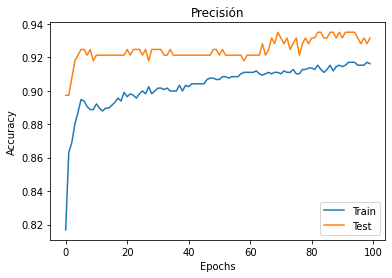

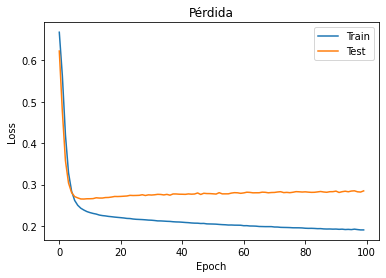

In [18]:
# Plot Precisión

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precisión')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot Pérdida

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()